In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 
import datetime

In [2]:
# importing data

data = pd.read_csv('/path/to/csv', parse_dates=['date'])
data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2020-08-01,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,2020-08-01,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,2020-08-01,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,2020-08-01,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,2020-08-01,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [3]:
data['month'] = data['date'].dt.month
data['dayofweek_name'] = data['date'].dt.strftime("%a")

data['year_month'] = data['date'].dt.strftime('%Y-%m')
data['week_num'] = data['date'].dt.week

data['CTR'] = ((data['clicks']/data['impressions'])*100)
data['CPC'] = data['cost']/data['clicks']

data['CPA'] = data['cost']/data['conversions']
# data.head()

In [4]:
def preprocess(df):
    df['dayofweek_name'] = df['date'].dt.strftime("%a")

    df['year_month'] = df['date'].dt.strftime('%Y-%m')

    label_encoder = LabelEncoder()
    df['adgroup_enc']= label_encoder.fit_transform(df['adgroup'])
    # data['adgroup_enc'].unique()

    df['ad_enc'] = label_encoder.fit_transform(df['ad'])
    # data['ad_enc'].unique()

    df['campaign_enc'] = label_encoder.fit_transform(df['campaign'])
    # data['campaign_enc'].unique()

    df['weekname_enc'] = label_encoder.fit_transform(df['dayofweek_name'])

    df['month_enc'] = label_encoder.fit_transform(df['year_month'])
    # data['month_enc'].unique()
    


In [5]:
preprocess(data)

In [6]:
pf = data.groupby('year_month')
lis = ['2020-08','2020-09','2020-10','2020-11','2020-12', '2021-01', '2021-02']

mean_conversions = []
mean_clicks = []
mean_impressions = []

for m in lis:
    df_group = pf.get_group(m)
    mean_conversions.append(df_group['conversions'].mean())
    mean_clicks.append(df_group['clicks'].mean())
    mean_impressions.append(df_group['impressions'].mean())
# mean_conversions   
# mean_clicks
    
mean_clicks=['%.2f' % f for f in mean_clicks]
mean_clicks = [float(f) for f in mean_clicks]
mean_conversions=['%.2f' % f for f in mean_conversions]
mean_conversions = [float(f) for f in mean_conversions]
mean_impressions=['%.2f' % f for f in mean_impressions]
mean_impressions = [float(f) for f in mean_impressions]


# exploratory data analysis

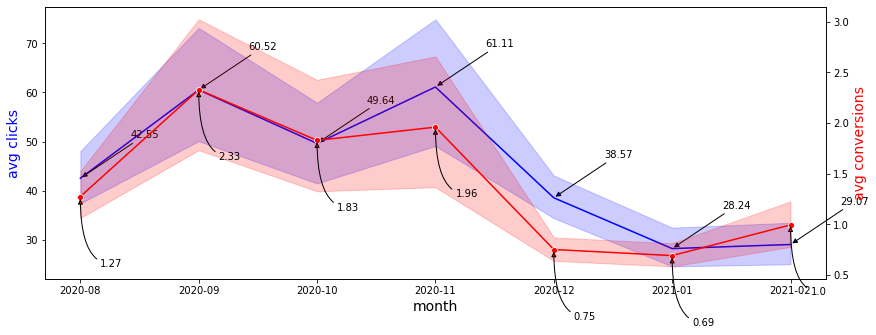

In [60]:
fig, ax1 = plt.subplots(figsize=(14, 5))  # initializes figure and plots

ax2 = ax1.twinx() 
y2 = data['conversions']
ax3=sns.lineplot(x =data['year_month'] , y = data['clicks'], ax = ax1,color = 'blue', legend='full') # plots the first set of data, and sets it to ax1. 
ax4=sns.lineplot(x = data['year_month'], y = data['conversions'], marker = 'o', color = 'red', ax = ax2) # plots the second set, and sets to ax2. 

# these lines add the annotations for the plot. 
ax1.set_xlabel('month',size=14)
ax1.set_ylabel('avg clicks', color='b', size=14)
ax2.set_ylabel('avg conversions', color='r',size=14)

for i, v in enumerate(mean_clicks):
    annot=ax3.annotate(str(v), xy=(i,v), xytext=(50,40),textcoords='offset points',
                       arrowprops=dict(facecolor='blue', arrowstyle='-|>'))
for j, w in enumerate(mean_conversions):
    ax4.annotate(str(w), xy=(j,w), xytext=(20,-70), textcoords='offset points', 
                 arrowprops=dict(facecolor='red',arrowstyle="-|>", connectionstyle="angle3,angleA=0,angleB=-90"))


plt.show()


In [44]:
# We see there is positive correlation between mean clicks and conversions. 
# However, between Jan 2021 and Feb 2021, there is negative correlation between the two variables 
# due to unknown factors.

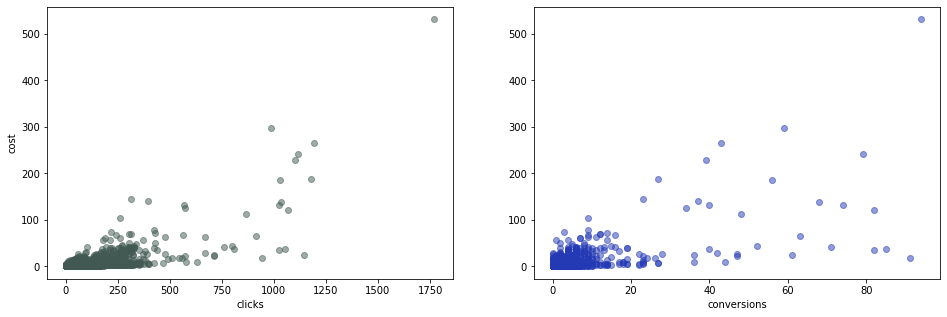

In [48]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

ax=ax.flatten()

cols = ['clicks','conversions']
colors=['#415952', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('cost')
    i.scatter(data[cols[j]], data['cost'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    j+=1

plt.show()

In [62]:
# The above plot indicates that higher the spend, more the number of clicks and more conversions. 
# In order to maximize the revenue, more insights have to be obtained,

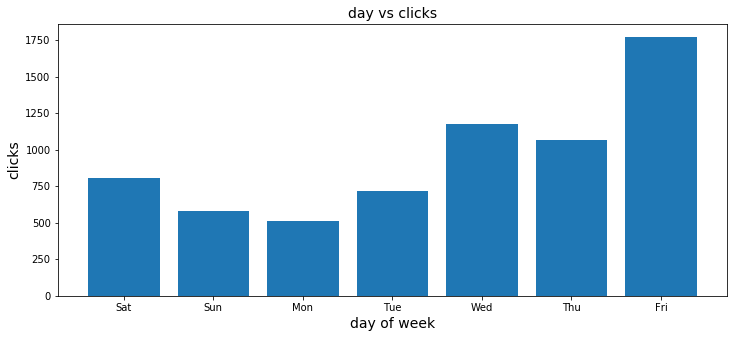

In [13]:
fig, ax1 = plt.subplots(figsize=(12, 5))  # initializes figure and plots

plt.bar(data['dayofweek_name'], data['clicks'])
plt.title('day vs clicks', size = 14)
plt.ylabel('clicks', size = 14)
plt.xlabel('day of week', size = 14)

# Set the y-axis to begin at 0
# plt.ylim(0)

# Display the plot  # there is seems to be one spike after 15 jan
plt.show()

In [ ]:
# From the above graph, we can say that the average number of clicks is maximum on Friday, 
# followed by Wednesday and Thursday. Hence we can say that clicks are a function of days.

In [14]:
data.columns

Index(['date', 'campaign', 'adgroup', 'ad', 'impressions', 'clicks', 'cost',
       'conversions', 'revenue', 'month', 'dayofweek_name', 'year_month',
       'week_num', 'CTR', 'CPC', 'CPA', 'adgroup_enc', 'ad_enc',
       'campaign_enc', 'weekname_enc', 'month_enc'],
      dtype='object')

In [15]:
df = data.groupby('adgroup')
lis = ['adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4']

sum_rev = []
sum_cost = []
for m in lis:
    df1 = df.get_group(m)
    sum_rev.append(np.sum(df1['revenue']))
    sum_cost.append(np.sum(df1['cost']))
    
print(sum_rev)
print(sum_cost)

roi = [i/j for i, j in zip(sum_rev, sum_cost)]

print(roi)

[515630.85, 3750.27, 526427.6399999999, 14047.71]
[6486.02, 118.99999999999999, 5873.71, 323.88]
[79.49880666417926, 31.514873949579837, 89.62438390727495, 43.373193775472394]


In [16]:
data1 = data[(data['date']> '2021-01-01') & (data['date'] < '2021-01-16')]


In [11]:
df = data1.groupby('adgroup')
lis = ['adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4']

sum_rev = []
sum_cost = []
for m in lis:
    df1 = df.get_group(m)
    sum_rev.append(np.sum(df1['revenue']))
    sum_cost.append(np.sum(df1['cost']))
    
print(sum_rev)
print(sum_cost)

roi = [i/j for i, j in zip(sum_rev, sum_cost)]

print(roi)

[14196.51, 51.5, 11999.72, 136.6]
[53.02, 1.2600000000000002, 55.21, 1.23]
[267.7576386269332, 40.873015873015866, 217.3468574533599, 111.05691056910568]


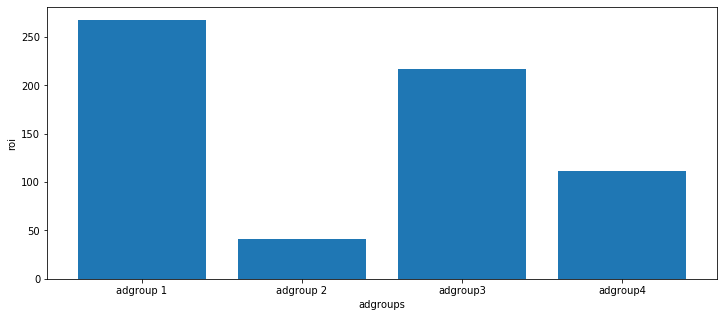

In [12]:
fig, ax1 = plt.subplots(figsize=(12, 5))  # initializes figure and plots

ad_list = ['adgroup 1', 'adgroup 2', 'adgroup3', 'adgroup4']

plt.bar(ad_list, roi)

plt.xlabel('adgroups')
plt.ylabel('roi')
plt.show()

In [ ]:
# From the above plot, we can conclude that ROAS is maximum for adgroup 1 between the period
# Jan-1-2021 to Jan-15-2021

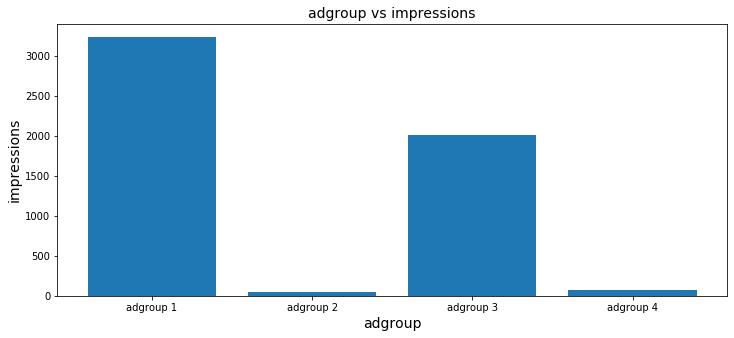

In [8]:
# analysis of ctr done
fig, ax1 = plt.subplots(figsize=(12, 5))  # initializes figure and plots

plt.bar(data['adgroup'], data['impressions'])
plt.title('adgroup vs impressions', size = 14)
plt.ylabel('impressions', size = 14)
plt.xlabel('adgroup', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot  # there is seems to be one spike after 15 jan
plt.show()

In [ ]:
# Here we can see that adgroup 1 has maximum reach

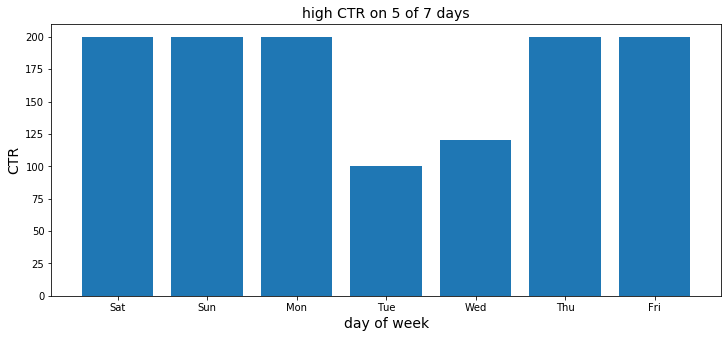

In [11]:
# analysis of ctr done
fig, ax1 = plt.subplots(figsize=(12, 5))  # initializes figure and plots

plt.bar(data['dayofweek_name'], data['CTR'])
plt.title('high CTR on 5 of 7 days', size = 14)
plt.ylabel('CTR', size = 14)
plt.xlabel('day of week', size = 14)

# Set the y-axis to begin at 0
# plt.ylim(0)

# Display the plot  # there is seems to be one spike after 15 jan
plt.show()

In [ ]:
# Here, we can say that average CTR is high on most days of the week

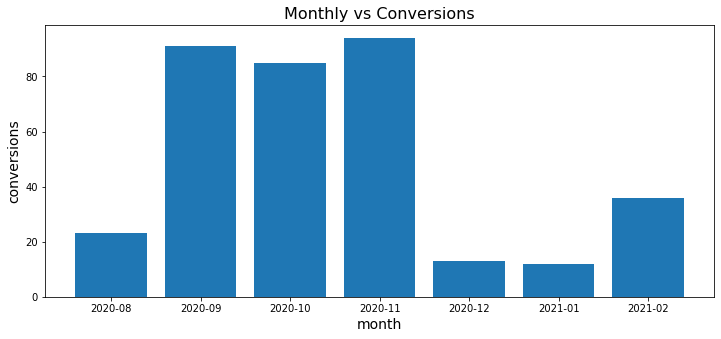

In [12]:
fig, ax1 = plt.subplots(figsize=(12, 5))  # initializes figure and plots

plt.bar(data['year_month'], data['conversions'])
plt.title('Monthly vs Conversions', size = 16)
plt.ylabel('conversions', size = 14)
plt.xlabel('month', size = 14)

# Set the y-axis to begin at 0

# Display the plot 
plt.show()

In [ ]:
# From above graph, we can say that maximum conversions took place in November 2020 and September 2020.
# Post November 2020, conversions have dropped significantly.

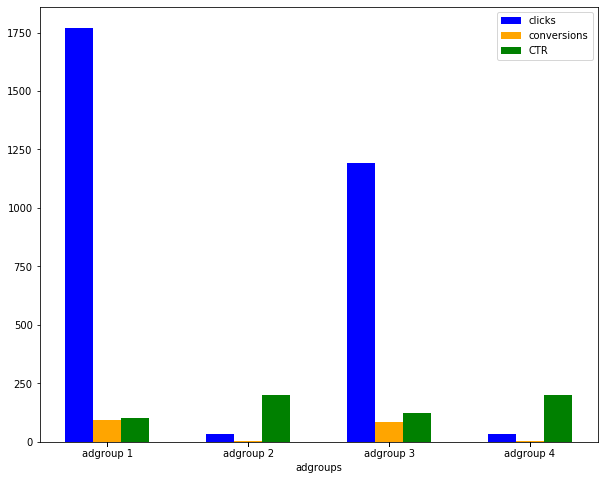

In [51]:
x = data['adgroup_enc']
fig, ax = plt.subplots(figsize=(10, 8))

width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, data['clicks'], width, color='blue')
plt.bar(x, data['conversions'], width, color='orange')
plt.bar(x+0.2, data['CTR'], width, color='green')
plt.xticks(x, ['adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4'])
plt.xlabel("adgroups")
plt.legend(["clicks", "conversions", "CTR"])
plt.ylim(0)
plt.show()

In [ ]:
# From above graph, we can see that clicks as well as conversions is the highest for adgroup 1 
# followed by adgroup 3. 
# Although, click through rate is highest for adgroup 2 and adgroup 4. 

# From this we can say that, although adgroups 2 and 4 is generating click-worthy interest, the audience is
# not converting at a satisfactory rate. 
# It might be time to look at the quality of the landing page, ad relevance and targeting.

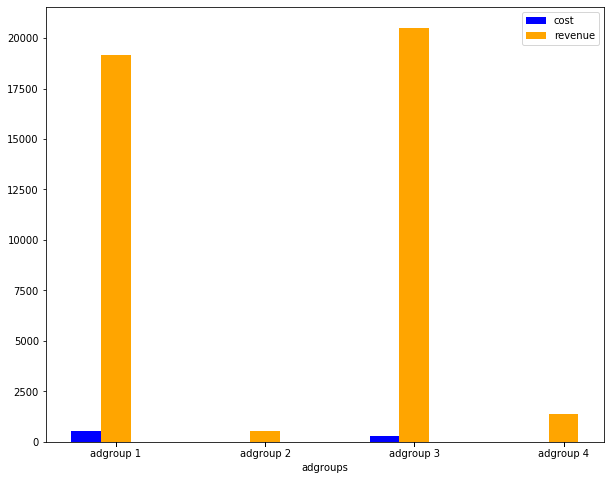

In [50]:
x = data['adgroup_enc']
fig, ax = plt.subplots(figsize=(10, 8))

width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, data['cost'], width, color='blue')
plt.bar(x, data['revenue'], width, color='orange')
plt.xticks(x, ['adgroup 1', 'adgroup 2', 'adgroup 3', 'adgroup 4'])
plt.xlabel("adgroups")
plt.legend(["cost", "revenue"])
plt.ylim(0)
plt.show()

In [40]:
df = [1,2,3,4,5]

mean = np.mean(df)
df_dev = []
for i in df:
    df_dev.append(i-mean)
    
df_dev = [i**2 for i in df_dev]

df_dev=np.array(df_dev)
var = (df_dev.sum())/len(df_dev)
np.sqrt(var)
# df_dev/(len(df_dev))

1.4142135623730951

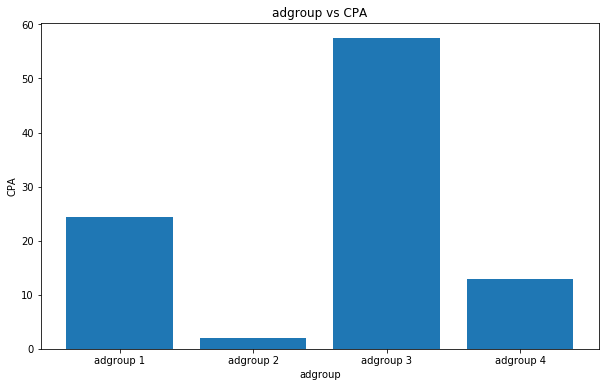

In [32]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Add x-axis and y-axis
plt.bar(data['adgroup'],data['CPA'])

# Set title and labels for axes
plt.xlabel("adgroup")
plt.ylabel("CPA")
plt.title("adgroup vs CPA")

plt.show()


In [ ]:
# We can see that cost for adgroup1 is the highest but CPA is low. This means that conversions for 
# adgroup 1 is high.
# Whereas, cost for adgroup 3 is relatively low but CPA is highest. 
# This could be due to, perhaps lower conversions.

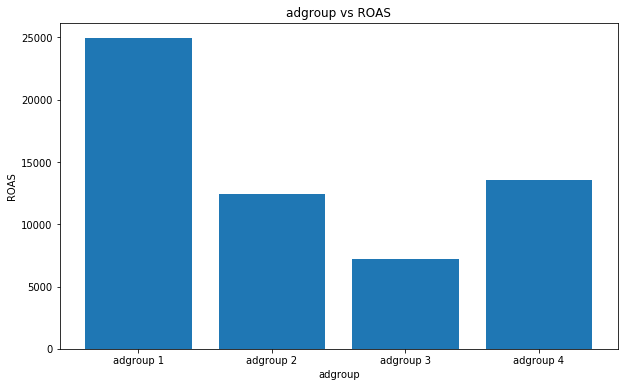

In [27]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Add x-axis and y-axis
plt.bar(data['adgroup'],data['ROI'])

# Set title and labels for axes
plt.xlabel("adgroup")
plt.ylabel("ROAS")
plt.title("adgroup vs ROAS")

plt.show()


In [ ]:
# We can conclude from above graph that adgroup 1 yields highest ROAS. 
# Hence we can say that effectiveness for adgroup 1 was highest and is the most successful adgroup in terms of revenue generation.
# Also, low ROI of adgroup 3 could be due to factors directly or indirectly related to the ad campaign. 


In [23]:
grouped_df = data.groupby(['adgroup']).agg({'clicks':'sum','cost':'mean','conversions':'mean','revenue':'mean' ,'ROI':['mean']}) 
grouped_df

,clicks,cost,conversions,revenue,ROI
,sum,mean,mean,mean,mean
adgroup,,,,,
adgroup 1,92533,4.936088,2.305936,392.413128,197.603784
adgroup 2,1663,0.163686,0.037139,5.158556,104.788511
adgroup 3,101441,3.512984,1.784091,314.849067,161.559581
adgroup 4,2474,0.377483,0.094406,16.372622,180.902096


In [ ]:
# Conclusion:
# It is assumed that business performance is measured by the revenue generated, and ROAS is considered as
# a crucial metric used to identify campaign performance.
# The analysis indicates that future ad campaigns should be focused on adgroup 1 since it is most 
# effective for profit generation.
# also its CPA is not very high, perhaps because conversions for adgroup 1 is high.
# mean revenue of adgroup 1 is the highest
# This suggests that, had a similar campaign been run, adgroup 1 is of importance 
# and should be promoted in future. 

# on the other hand, eventhough the revenue generated by adgroup 3 is relatively high,
# it has a high CPA and low ROAS. This could be because, perhaps because products in that group are priced too low.
# These are indicators that adgroup 3 not a very profitable adgroup.


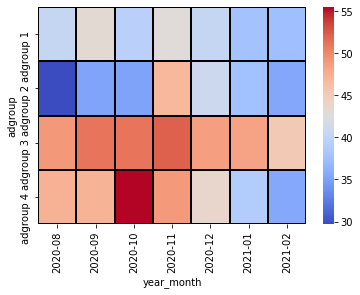

In [16]:
data_pt1 = data.pivot_table(index='adgroup', columns='year_month', values='CTR')
sns.heatmap(data_pt1, cmap='coolwarm', linecolor='black', linewidths=1)

In [ ]:
# Above plot indicates that CTR was highest for adgroup4 during October 2020.

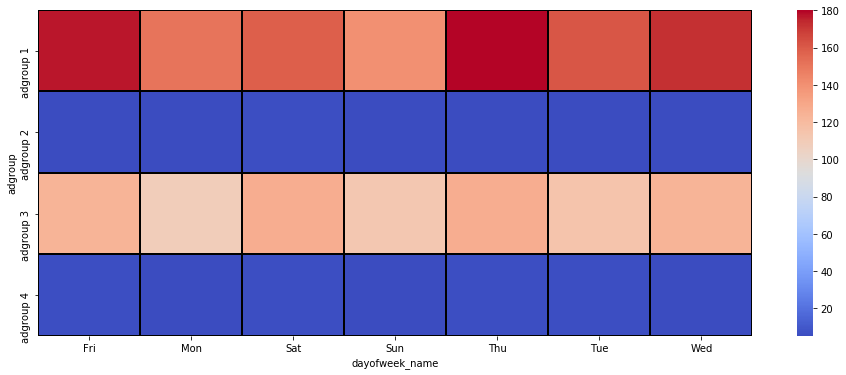

In [82]:
data_pt4=data.pivot_table(columns='dayofweek_name', index='adgroup', values='impressions')
sns.heatmap(data_pt4, cmap='coolwarm', linecolor='black', linewidths=1)

In [ ]:
# This indicates that maximum impressions took place for adgroup 1 on Thusrday

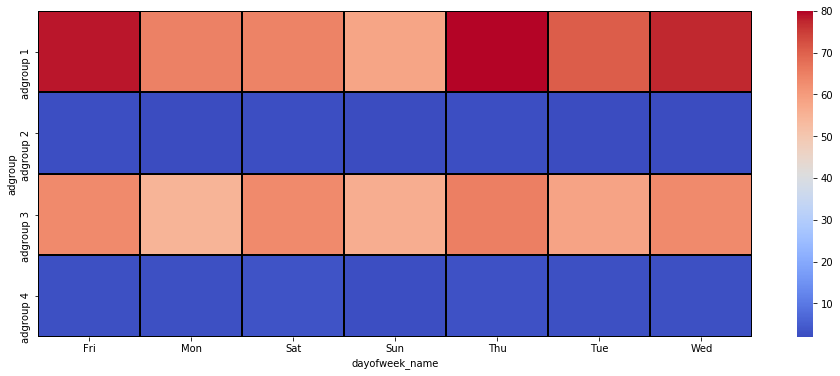

In [80]:
data_pt4=data.pivot_table(columns='dayofweek_name', index='adgroup', values='clicks')
sns.heatmap(data_pt4, cmap='coolwarm', linecolor='black', linewidths=1)

In [ ]:
# Similar to the previous plot, this plot suggests that clicks were at the peak on a Thursday

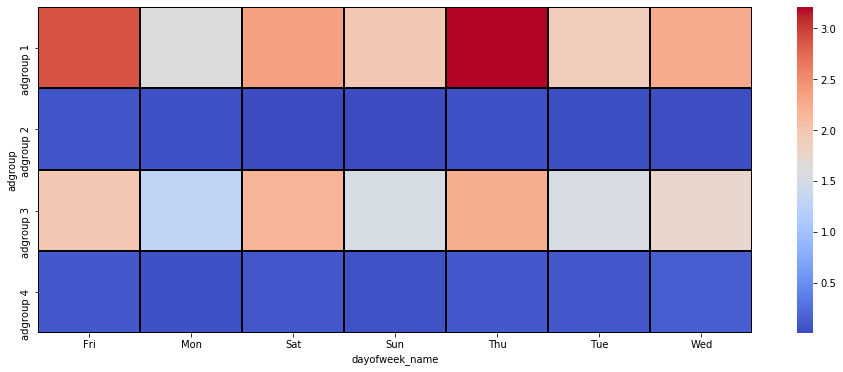

In [81]:
data_pt3=data.pivot_table(columns='dayofweek_name', index='adgroup', values='conversions')
sns.heatmap(data_pt3, cmap='coolwarm', linecolor='black', linewidths=1)

In [ ]:
# From above plots, clicks and conversions is highest for adgroup 1 on Thursday.
# From this, we can see that, in order to maximize conversions, and hence ROAS, 
# adgroup 1 should be live on a Thursday.

## ML


In [7]:
pred = pd.read_csv('/path/to/csv', parse_dates=['date'])
sample = pd.read_csv('/path/to/csv')


In [8]:
preprocess(pred)
pred.head()

,index,date,campaign,adgroup,ad,cost,dayofweek_name,year_month,adgroup_enc,ad_enc,campaign_enc,weekname_enc,month_enc
0,0,2021-03-01,campaign 1,adgroup 1,ad 1,0.58,Mon,2021-03,0,0,0,1,0
1,1,2021-03-01,campaign 1,adgroup 3,ad 1,0.17,Mon,2021-03,2,0,0,1,0
2,2,2021-03-01,campaign 1,adgroup 4,ad 1,0.05,Mon,2021-03,3,0,0,1,0
3,3,2021-03-01,campaign 1,adgroup 2,ad 1,0.01,Mon,2021-03,1,0,0,1,0
4,4,2021-03-01,campaign 1,adgroup 2,ad 2,0.01,Mon,2021-03,1,2,0,1,0


In [9]:
features = data[['cost', 'adgroup_enc', 'ad_enc', 'campaign_enc','weekname_enc','month_enc']]

In [73]:
pred_test = pred.drop(['index','date', 'campaign', 'adgroup', 'ad', 'dayofweek_name', 'year_month'], axis=1)
pred_test.head()
pred_test.shape

(318, 6)

In [10]:
label_list = ['impressions', 'clicks', 'conversions', 'revenue']

for lis in label_list:
    labels = data[lis]
    X_train, X_test, y_train, y_test = train_test_split(features , labels , test_size=0.25 , random_state=0)
    rdregressor = RandomForestRegressor(n_estimators=5)
    rdregressor.fit(X_train,y_train)
    y_pred = rdregressor.predict(X_test)
#     y_pred1 = rdregressor.predict(pred_test)
    print(y_pred)
#     print(y_test)

    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    print('R2 score: ',sklearn.metrics.r2_score(y_test, y_pred))
#     sample[lis] = y_pred1
    print(lis + ' col made in sample')
    print('*'*20)

[  8.4 301.4 237.8 ...   1.   19.8 200.4]
Mean Absolute Error: 29.701866433362493
Mean Squared Error: 5753.214019597551
Root Mean Squared Error: 75.84994409752423
R2 score:  0.7879456630921562
impressions col made in sample
********************
[  2.8 117.8 105.  ...   0.    8.  106.2]
Mean Absolute Error: 13.292717576969546
Mean Squared Error: 1431.9190218155268
Root Mean Squared Error: 37.84070588421319
R2 score:  0.770612068501253
clicks col made in sample
********************
[0.2 2.  4.2 ... 0.  0.2 1.6]
Mean Absolute Error: 0.9287547389909594
Mean Squared Error: 6.633783415961894
Root Mean Squared Error: 2.57561321163755
R2 score:  0.4215815224565892
conversions col made in sample
********************
[ 85.204 131.68  643.93  ...   0.     35.924 468.546]
Mean Absolute Error: 193.73428579760863
Mean Squared Error: 372200.76164066524
Root Mean Squared Error: 610.0825859182224
R2 score:  0.3525752603270478
revenue col made in sample
********************


In [ ]:
# edit path to save file

# sample.to_csv('/path/to/output.csv')